# Create Combined Active Learning Figure
---

# Notebook Setup

## Import Modules

In [1]:
import os
print(os.getcwd())
import sys

import copy
import pickle

import numpy as np

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# #############################################################################
from plotting.my_plotly import my_plotly_plot

/mnt/f/Dropbox/01_norskov/00_git_repos/PROJ_IrOx_Active_Learning_OER/workflow/ml_modelling/00_ml_workflow/combined_al_plot


In [2]:
sys.path.insert(0, os.path.join(
    os.environ["PROJ_irox"],
    "workflow/ml_modelling/00_ml_workflow"))
    # "workflow/ml_modelling/00_ml_workflow/191102_new_workflow"))

from al_data import main_AB2_run, main_AB3_run, gens_to_plot_dict

## Script Inputs

In [3]:
# stoich_i = "AB2"
stoich_i = "AB3"

# inset_x_range = [-0.5, 11.6]
# inset_x_range = [-0.5, 15.5]
# inset_x_range = [-0.6, 15.5]
# inset_x_range = [-0.7, 15.5]
inset_x_range = [-0.8, 15.5]

# Position of AL performance plot
al_perf_subplot_coord = [4, 5]

left_padding_subplot = True

In [4]:
if sys.argv[-1] == "AB2" or sys.argv[-1] == "AB3":
    stoich_i = sys.argv[-1]

print("sys.argv[-1]:", sys.argv[-1])
print("stoich_i:", stoich_i)

sys.argv[-1]: /home/raul_desktop/.local/share/jupyter/runtime/kernel-433a67de-77ce-4e6a-a5b2-e21fe8aa2b38.json
stoich_i: AB3


In [5]:
gens_to_plot = gens_to_plot_dict[stoich_i]

## Read Data

In [6]:
path_root = os.path.join(
    os.environ["PROJ_irox"],
    "workflow/ml_modelling")

In [7]:
# #############################################################################
# AL Performance ##############################################################
path_i = os.path.join(
    path_root,
    # "00_ml_workflow/191102_new_workflow/performance_comp/top_10_disc_vs_dft/out_data",
    "00_ml_workflow/performance_comp/top_10_disc_vs_dft/out_data",
    stoich_i + "_" + "fig_al_perf.pickle")
with open(path_i, "rb") as fle:
    fig_perf = pickle.load(fle)

# #############################################################################
# ALL Figures #################################################################
path_i = os.path.join(
    path_root,
    # "00_ml_workflow/191102_new_workflow/al_plots_for_figure/out_data",
    "00_ml_workflow/al_plots_for_figure/out_data",
    stoich_i + "_False_" + "figs_dict__v2.pickle")
with open(path_i, "rb") as fle:
    fig_dict = pickle.load(fle)

fig_al_series = fig_dict["fig_al_series"]
traces_tracking = fig_dict["traces_tracking"]
num_dft_list = fig_dict["num_dft_list"]

path_i = os.path.join(
    path_root,
    # "00_ml_workflow/191102_new_workflow/al_plots_for_figure/out_data",
    "00_ml_workflow/al_plots_for_figure/out_data",
    stoich_i + "_True_" + "figs_dict__v2.pickle")
with open(path_i, "rb") as fle:
    fig_dict = pickle.load(fle)

fig_al_series_top10 = fig_dict["fig_al_series"]
# traces_tracking = fig_dict["traces_tracking"]
# num_dft_list = fig_dict["num_dft_list"]

# Create Subplot

## Instantiate Subplot

In [8]:
# #########################################################
l_tmp = 0.
spec_d0 = dict(l=l_tmp, b=0.)
spec_d1 = dict()
spec_d2 = dict()
spec_d3 = dict()
spec_d4 = dict()

# #########################################################
l_tmp = 0.
t_tmp = -0.001
spec_00 = dict(l=l_tmp, t=t_tmp)
spec_01 = dict(t=t_tmp)
spec_02 = dict(t=t_tmp)
spec_03 = dict(t=t_tmp)
spec_04 = dict(t=t_tmp)

# #########################################################
# l_tmp = 0.033
# l_tmp = 0.025
l_tmp = 0.027
t_tmp = 0.0025
# spec_10 = dict(l=0.025, r=0., t=t_tmp, b=0.)
spec_10 = dict(l=0.03, r=0., t=t_tmp, b=0.)
spec_11 = dict(l=l_tmp, r=0., t=t_tmp, b=0.)
spec_12 = dict(l=l_tmp, r=0., t=t_tmp, b=0.)

# spec_13 = dict(l=0.044, r=0., t=t_tmp, b=0.)
# spec_13 = dict(l=0.03, r=0., t=t_tmp, b=0.)
spec_13 = dict(l=0.035, r=0., t=t_tmp, b=0.)

# spec_14 = dict(l=0.03, r=0., t=t_tmp, b=0.)
# spec_14 = dict(l=0.08, r=0., t=t_tmp, b=0.)
# spec_14 = dict(l=0.04, r=0., t=t_tmp, b=0.)
spec_14 = dict(l=0.035, r=0., t=t_tmp, b=0.)

# #########################################################
spec_20 = dict()
spec_21 = dict()
spec_22 = dict()
# spec_23 = dict(rowspan=1, colspan=2, l=0.2, t=0.1)
# spec_23 = dict(rowspan=1, colspan=2, l=0.2, t=0.15)
spec_23 = dict(rowspan=1, colspan=2, l=0.2, t=0.13)
spec_24 = None

# #########################################################
spec_dtmp = dict(rowspan=1)
# spec_0tmp = dict(rowspan=3)
spec_0tmp = None
spec_1tmp = None
spec_2tmp = None
dx_tmp = 0.11
dx_d6 = dx_tmp / 6
fig = make_subplots(
    rows=4, cols=6,
    specs=[
        [spec_dtmp, spec_d0, spec_d1, spec_d2, spec_d3, spec_d4],
        [spec_0tmp, spec_00, spec_01, spec_02, spec_03, spec_04],
        [spec_1tmp, spec_10, spec_11, spec_12, spec_13, spec_14],
        [spec_2tmp, spec_20, spec_21, spec_22, spec_23, spec_24],
        ],
    print_grid=False,
    shared_yaxes=False,
    horizontal_spacing=0.015,
    vertical_spacing=0.,
    row_heights=[
        0.03,
        0.33 + 0.06 - 0.05 + 0.07,
        0.14 - 0.06 + 0.03,
        0.45,
        ],
    column_widths=[1 / 6 - dx_tmp, 1 / 6 + dx_d6, 1 / 6 + dx_d6, 1 / 6 + dx_d6, 1 / 6 + dx_d6, 1 / 6 + dx_d6],
    )

## Add traces

In [9]:
for i_cnt, traces_i in enumerate(traces_tracking):
    for trace_j in traces_i:
        fig.add_trace(trace_j, row=1, col=i_cnt + 2)

In [10]:
for trace in fig_al_series.data:
    indices_to_delete = np.argwhere(trace.x==-60)

    trace.x = np.delete(trace.x, indices_to_delete)
    trace.y = np.delete(trace.y, indices_to_delete)


    if trace.marker.color is not None:
        trace.marker.color = list(np.delete(trace.marker.color, indices_to_delete))
    if trace.marker.line.color is not None:
        trace.marker.line.color = np.delete(trace.marker.line.color, indices_to_delete)
    if trace.marker.line.width is not None:
        trace.marker.line.width = np.delete(trace.marker.line.width, indices_to_delete)
    if trace.marker.size is not None:
        trace.marker.size = list(np.delete(trace.marker.size, indices_to_delete))
    if trace.marker.symbol is not None:
        trace.marker.symbol = list(np.delete(trace.marker.symbol, indices_to_delete))
    if trace.text is not None:
        trace.text = list(np.delete(trace.text, indices_to_delete))
        
for trace in fig_al_series_top10.data:
    indices_to_delete = np.argwhere(trace.x==-60)

    trace.x = np.delete(trace.x, indices_to_delete)
    trace.y = np.delete(trace.y, indices_to_delete)


    if trace.marker.color is not None:
        trace.marker.color = list(np.delete(trace.marker.color, indices_to_delete))
    if trace.marker.line.color is not None:
        trace.marker.line.color = np.delete(trace.marker.line.color, indices_to_delete)
    if trace.marker.line.width is not None:
        trace.marker.line.width = np.delete(trace.marker.line.width, indices_to_delete)
    if trace.marker.size is not None:
        trace.marker.size = list(np.delete(trace.marker.size, indices_to_delete))
    if trace.marker.symbol is not None:
        trace.marker.symbol = list(np.delete(trace.marker.symbol, indices_to_delete))
    if trace.text is not None:
        trace.text = list(np.delete(trace.text, indices_to_delete))

In [11]:
# #############################################################################
# Add 1st row, AL progression #################################################
for trace_i in fig_al_series.data:
    if trace_i.xaxis == "x":
        if left_padding_subplot:
            col_i = 2
        else:
            col_i = 1

    else:
        if left_padding_subplot:
            col_i = int(trace_i.xaxis[1:])
            col_i += 1
        else:
            col_i = int(trace_i.xaxis[1:])
    
    # print(col_i)
    fig.add_trace(
        trace_i,
        # row=1,
        row=2,
        col=col_i,
        )


# #############################################################################
# Add 2nd row, smaller insets #################################################

# for trace_i in fig_al_series.data:
for trace_i in fig_al_series_top10.data:
    if trace_i.xaxis == "x":
        if left_padding_subplot:
            col_i = 2
        else:
            col_i = 1

    else:
        if left_padding_subplot:
            col_i = int(trace_i.xaxis[1:])
            col_i += 1
        else:
            col_i = 1

    fig.add_trace(
        trace_i,
        # row=2,
        row=3,
        col=col_i,
        )


# #####################################1#######################################
# Add AL performance plot #####################################################
for trace_i in fig_perf.data:
    fig.add_trace(
        trace_i,
        row=al_perf_subplot_coord[0],
        col=al_perf_subplot_coord[1],
        )

# Calculating y-range for inset plots

In [12]:
traces_all = []
for i in range(1, 6):

    traces_i = dict()
    for trace_i in fig_al_series.data:
        if i == 1:
            if trace_i.xaxis == "x":
                traces_i[trace_i.name] = trace_i
        else:
            if trace_i.xaxis == "x" + str(i):
                traces_i[trace_i.name] = trace_i

    traces_all.append(traces_i)

In [13]:
inset_y_ranges = []
for i_cnt, traces_i in enumerate(traces_all):
#     if i_cnt == 4:
#         break

    trace_main = traces_i["main"]
    trace_i = trace_main

    indices_to_delete_0 = np.argwhere(trace_i.x<inset_x_range[0])
    indices_to_delete_1 = np.argwhere(trace_i.x>inset_x_range[1])
    indices_to_delete_0 = indices_to_delete_0.flatten()
    indices_to_delete_1 = indices_to_delete_1.flatten()
    indices_to_delete = np.array(list(indices_to_delete_0) + list(indices_to_delete_1))

    y_subset = np.delete(trace_i.y, indices_to_delete)

    y_subset_min = y_subset.min()
    y_subset_max = y_subset.max()

    y_range = abs(y_subset_max - y_subset_min)

    # #################################

    trace_error_low = traces_i["error_low"]
    trace_i = trace_error_low

    indices_to_delete_0 = np.argwhere(trace_i.x<inset_x_range[0])
    indices_to_delete_1 = np.argwhere(trace_i.x>inset_x_range[1])
    indices_to_delete_0 = indices_to_delete_0.flatten()
    indices_to_delete_1 = indices_to_delete_1.flatten()
    indices_to_delete = np.array(list(indices_to_delete_0) + list(indices_to_delete_1))

    err_low_subset = np.delete(trace_i.y, indices_to_delete)
    err_low_subset_min = err_low_subset.min()


    # #################################
    y_range = abs(y_subset_max - err_low_subset_min)
    # y_padd = y_range * 0.1
    y_padd = y_range * 0.2

    # #################################
    inset_y_range_i = [
        err_low_subset_min - y_padd,
        # y_subset.min() - y_padd,
        y_subset.max() + y_padd,
        ]
    inset_y_ranges.append(inset_y_range_i)

inset_y_ranges = np.array(inset_y_ranges)

# Setting master layout properties

In [14]:
%%capture

layout = fig_perf.layout

layout_tmp = go.Layout()

layout_tmp.font = layout.font
# layout_tmp.paper_bgcolor = layout.paper_bgcolor
# layout_tmp.plot_bgcolor = layout.plot_bgcolor
layout_tmp.showlegend = layout.showlegend

fig.update_layout(**layout_tmp.to_plotly_json())

# fig.layout.font


# #############################################################################
fig.update_layout(
    width=-7 + 18.4 * 37.795275591,  # COMBAK
    # height=12.5 * 37.795275591,
    # height=13.5 * 37.795275591,
    height=13.3 * 37.795275591,

    paper_bgcolor="rgba(255,255,255,0.)",
    # paper_bgcolor="rgba(255,255,20,0.7)",

    plot_bgcolor="rgba(255,255,255,1.)",

    font=go.layout.Font({
        "color": "black",
        "family": "Arial, Times New Roman, monospace",
        # "family": "Times New Roman",
        }),

    margin=go.layout.Margin(
        b=10,
        l=0,
        r=0,
        t=10,
        ),

    )


# #############################################################################
axis_shared = dict(
    linecolor="black",
    linewidth=1.0,
    mirror=True,
    showgrid=False,
    showline=True,
    tickcolor="black",
    tickfont={"color": "black", "size": 8 * (4 / 3)},
    ticks="outside",
    title={"font": {"color": "black", "size": 10 * (4 /3)}},
    zeroline=False,
    )

fig.update_xaxes(axis_shared)
fig.update_yaxes(axis_shared)

# Processing AL Main Plot (Row 01)
---

## Inset plot dimensions/ranges

In [15]:
if stoich_i ==  "AB2":
    y_range_inset_dict = {
        1: dict(range=inset_y_ranges[0] + [0., 0.],
            # tick0=-0.7,
            dtick=0.,
            padding=[14, +0.02],
            ),
        2: dict(range=inset_y_ranges[1] + [0.1, 0.15],
            dtick=0.5,
            padding=[13, 0.017],
            ),
        3: dict(range=inset_y_ranges[2] + [-0.001, 0.],
            dtick=0.1,
            padding=[13, 0.017],
            ),
        4: dict(range=inset_y_ranges[3] + [0.01, 0.02],
            dtick=0.1,
            padding=[13, 0.07],
            ),
        5: dict(range=inset_y_ranges[4],
            dtick=0.1,
            padding=[13, 0.07],
            ),
        }

elif stoich_i == "AB3":
    y_range_inset_dict = {
        1: dict(range=inset_y_ranges[0] + [0., 0.],
            tick0=-0.7,
            dtick=0.2,
            padding=[10, +0.02],
            ),
        2: dict(range=inset_y_ranges[1] + [0.05, 0.],
            dtick=0.1,
            padding=[9, 0.017],
            ),
        3: dict(range=inset_y_ranges[2] + [0.05, 0.],
            dtick=0.1,
            padding=[9, 0.017],
            ),
        4: dict(range=inset_y_ranges[3] + [0.01, 0.02],
            dtick=0.05,
            padding=[9, 0.07],
            ),
        5: dict(range=inset_y_ranges[4],
            dtick=0.05,
            padding=[9, 0.07],
            ),
        }

In [16]:
%%capture

if left_padding_subplot:
    range_tmp = range(2, 7)
else:
    range_tmp = range(1, 6)

for col_i in range_tmp:

    if stoich_i == "AB2":
        # x_range_i = [-30, 600]
        # x_range_i = [-30, 560]
        # x_range_i = [-30, 540]
        # x_range_i = [-30, 520]
        x_range_i = [-30, 510]
    elif stoich_i == "AB3":
        x_range_i = [-30, 258]

    # #########################################################################
    # #########################################################################    
    # #########################################################################

    # #################################
    xaxis_i = dict(
        # range=[-2, 15],
        # range=[-30, 258],
        range=x_range_i,
        ticks="inside",
        showticklabels=False,
        )
    fig.update_xaxes(**xaxis_i, row=2, col=col_i)

    # ##################################

    if stoich_i == "AB2":
        # y_range_i = [-3.2, 2.9]
        # y_range_i = [-6.2, 2.9]
        # y_range_i = [-4.2, 3.9]
        # y_range_i = [-4.2, 4.2]
        y_range_i = [-1.6, 2.]
    elif stoich_i == "AB3":
        y_range_i = [-1.047, 1.654]

    yaxis_i = dict(
        dtick=1.0,
        # range=[-1.047, 1.654],
        range=y_range_i,
        showticklabels=False,
        ticks="outside",
        )
    fig.update_yaxes(**yaxis_i, row=2, col=col_i)


    # #########################################################################
    # #########################################################################    
    # #########################################################################

    xaxis_i = dict(
        # range=[-30, 258],
        range=x_range_i,
        ticks="",
        showticklabels=False,
        )
    fig.update_xaxes(**xaxis_i, row=1, col=col_i)

    yaxis_i = dict(
        range=[5, 6],
        ticks="",
        showticklabels=False,
        )
    fig.update_yaxes(**yaxis_i, row=1, col=col_i)
    

if left_padding_subplot:
    col_i = 2
else:
    col_i = 1

fig.update_yaxes(patch=dict(
    showticklabels=True,
    ),

    selector=None, overwrite=True,
    row=2, col=col_i)

## Added inset rectangles on main plots

In [17]:
%%capture

shapes_tmp = []
for col_i, layout_i in y_range_inset_dict.items():
    # print(col_i)

    subplot_i = fig.get_subplot(2, col_i + 1)
    axis_num = subplot_i.xaxis.anchor[1:]


    if left_padding_subplot:
        col_i += 1

    range_y_i = layout_i["range"]
    padding_xy = layout_i["padding"]

    xref = "x" + axis_num
    yref = "y" + axis_num

    shape_i = go.layout.Shape(
        type="rect",

        x0=inset_x_range[0] - padding_xy[0],
        x1=inset_x_range[1] + padding_xy[0],
        y0=range_y_i[0] - padding_xy[1],
        y1=range_y_i[1] + padding_xy[1],

        xref=xref,
        yref=yref,
        line=dict(
            color="black",
            width=1.,
            ),
        )

    shapes_tmp.append(shape_i)

# COMBAK
fig.update_layout(shapes=shapes_tmp)

##  AL progression plots annotations

In [18]:
if left_padding_subplot:
    tmp = [str(i) for i in range(2, 7)]
else:
    tmp = [str(i) for i in range(1, 6)]
    tmp[0] = ""

axis_list = tmp

In [19]:
axis_list_new = []
for i in range(2, 7):
    axis_i = fig.get_subplot(2, i).xaxis.anchor[1:]
    axis_list_new.append(axis_i)

In [20]:
%%capture

if left_padding_subplot:
    left_x_pos = fig.get_subplot(row=2, col=2).xaxis.range[0]
    right_x_pos = fig.get_subplot(row=2, col=2).xaxis.range[1]
    top_y_pos = fig.get_subplot(row=2, col=2).yaxis.range[1]
else:
    left_x_pos = fig.layout.xaxis.range[0]
    top_y_pos = fig.layout.yaxis.range[1]

shared_annot_master = dict(
    # TEMP
    font={'size': (4 / 3) * 8},
    showarrow=False,
    # xanchor='left',
    yref="y" + fig.get_subplot(2, 2).yaxis.anchor[1:],
    yanchor='top')


shared_annot = dict(
    x=left_x_pos, y=top_y_pos,
    # yshift=2,
    yshift=-1,
    xshift=-1,
    xanchor='left',
    **shared_annot_master)

shared_annot_1 = dict(
    x=left_x_pos, y=top_y_pos,
    yshift=-1,
    # xshift=42,
    xshift=30,
    xanchor="center",
    **shared_annot_master)

shared_annot_2 = dict(
    x=right_x_pos, y=top_y_pos,
    xanchor="right",
    yshift=-1,
    # xshift=59,
    **shared_annot_master)


annotations = [

    dict(
        text="<b>i.</b> Gen: " + str(gens_to_plot[0]), xref="x" + axis_list_new[0],
        **shared_annot),
    dict(
        text="<b>ii.</b> Gen: " + str(gens_to_plot[1]), xref="x" + axis_list_new[1],
        **shared_annot),
    dict(
        text="<b>iii.</b> Gen: " + str(gens_to_plot[2]), xref="x" + axis_list_new[2],
        **shared_annot),
    dict(
        text="<b>iv.</b> Gen: " + str(gens_to_plot[3]), xref="x" + axis_list_new[3],
        **shared_annot),
    dict(
        text="<b>v.</b> Gen: " + str(gens_to_plot[4]), xref="x" + axis_list_new[4],
        **shared_annot),

    # #####################################################
    dict(
        text="# DFT: " + str(num_dft_list[0]), xref="x" + axis_list_new[0],
        **shared_annot_2),
    dict(
        text="# DFT: " + str(num_dft_list[1]), xref="x" + axis_list_new[1],
        **shared_annot_2),
    dict(
        text="# DFT: " + str(num_dft_list[2]), xref="x" + axis_list_new[2],
        **shared_annot_2),
    dict(
        text="# DFT: " + str(num_dft_list[3]), xref="x" + axis_list_new[3],
        **shared_annot_2),
    dict(
        text="# DFT: " + str(num_dft_list[4]), xref="x" + axis_list_new[4],
        **shared_annot_2),

    ]
fig.update_layout(annotations=annotations,)

# Processing AL Inset Plots (Row 02)
---

## Update layout of 2nd row (small inset) AL plots

In [21]:
%%capture

if left_padding_subplot:
    range_tmp = range(2, 7)
else:
    range_tmp = range(1, 6)

for col_i in range_tmp:
    # #################################
    xaxis_i = dict(
        range=inset_x_range,
        )

    # fig.update_xaxes(**xaxis_i, row=2, col=col_i)
    fig.update_xaxes(
        tickfont=dict(size=(4 / 3) * 7),
        **xaxis_i, row=3, col=col_i)

        
    # #################################
    if left_padding_subplot:
        col_i_tmp = col_i - 1

    y_range_i = y_range_inset_dict.get(col_i_tmp, [-3.5, 0.5])
    y_range_i.pop("padding")

    yaxis_i = dict(
        showticklabels=True,
        tickfont=dict(size=(4/3) * 7),
        **y_range_i,
        )
    fig.update_yaxes(**yaxis_i, row=3, col=col_i)

# Processing AL Performance Subplot (Row 03)
---

## Sett AL Perf annotations to that subplot

In [22]:
%%capture

subplot_i = fig.get_subplot(
    row=al_perf_subplot_coord[0],
    col=al_perf_subplot_coord[1])

for shape_i in fig_perf.layout.shapes:
    shape_i.xref = subplot_i.yaxis.anchor
    shape_i.yref = subplot_i.xaxis.anchor

shapes = fig_perf.layout.shapes

shapes_new = fig.layout.shapes + shapes
fig.update_layout(shapes=shapes_new)

# AL Performance Layout

In [23]:
%%capture
if stoich_i == "AB2":
    xaxis_range_i = [0, 465]
elif stoich_i == "AB3":
    xaxis_range_i = [0, 248]

fig.update_xaxes(
    patch=dict(
        title=dict(
            font=dict(size=13.333333333333332),
            text="DFT Calculations"),
        dtick=100,
        # range=[0, 248],
        range=xaxis_range_i,

        # tickangle=0,
        ),
    overwrite=True,
    row=al_perf_subplot_coord[0],
    col=al_perf_subplot_coord[1])

fig.update_yaxes(
    patch=dict(
        dtick=5,
        tickangle=0,
        range=[-0.3, 10.6],
        ),
    overwrite=True,
    row=al_perf_subplot_coord[0],
    col=al_perf_subplot_coord[1])

# Setting Master Annotations

In [24]:
shared_annot = go.layout.Annotation(
    xref="paper",
    yref="paper",
    showarrow=False,

    font=dict(
        color="black",
        size=13.33333333333333,
        ),

    )

new_annotations = [

    go.layout.Annotation(
        x=0.,
        y=0.873,
        text="ΔH<sub>f</sub> (eV/atom)",
        textangle=-90,
        **shared_annot.to_plotly_json()),

    ]

annot_old = fig.layout.annotations
annot_new = tuple(new_annotations) + annot_old

fig.layout.annotations = annot_new

# Adding secondary axis

In [25]:
minor_ticks_data = {

    "main_al_plots": {
        "x": 100,
        "y": 0.25,
        },

    }

Uncomment to add minor ticks

In [26]:
# from inputs import minor_ticks_data
from plotting.my_plotly import add_duplicate_axes

# #############################################################################
add_duplicate_axes(
    fig,
    axis_type='x',
    axis_data={
        "dtick": minor_ticks_data["main_al_plots"]["x"],
        "tickcolor": "black", "ticklen": 3},
    axis_num_list=[7, 8, 9, 10, 11],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )
add_duplicate_axes(
    fig,
    axis_type='y',
    axis_data={
        "dtick": minor_ticks_data["main_al_plots"]["y"],
        "tickcolor": "black", "ticklen": 3},
    axis_num_list=[7, 8, 9, 10, 11],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )


# #############################################################################
add_duplicate_axes(
    fig,
    axis_type='x',
    axis_data={"dtick": 1, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[12,],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )
add_duplicate_axes(
    fig,
    axis_type='y',
    axis_data={"dtick": 0.1, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[12, ],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )

add_duplicate_axes(
    fig,
    axis_type='x',
    axis_data={"dtick": 1, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[13,],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )
add_duplicate_axes(
    fig,
    axis_type='y',
    axis_data={"dtick": 0.05, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[13, ],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )


add_duplicate_axes(
    fig,
    axis_type='x',
    axis_data={"dtick": 1, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[14,],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )
add_duplicate_axes(
    fig,
    axis_type='y',
    axis_data={"dtick": 0.05, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[14, ],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )

add_duplicate_axes(
    fig,
    axis_type='x',
    axis_data={"dtick": 1., "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[15, 16],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )
add_duplicate_axes(
    fig,
    axis_type='y',
    axis_data={"dtick": 0.025, "tickcolor": "black", "ticklen": 3},
    # axis_num_list=[12, 13, 14, 15, 16],
    axis_num_list=[15, 16],
    # tmp_define_both_axis_types=False,
    tmp_define_both_axis_types=True,
    )

# #############################################################################
# AL Performanace Subplot
add_duplicate_axes(
    fig,
    axis_type='x',
    axis_data={"dtick": 50., "tickcolor": "black", "ticklen": 3},
    axis_num_list=[20, ],
    tmp_define_both_axis_types=True,
    )

add_duplicate_axes(
    fig,
    axis_type='y',
    axis_data={"dtick": 1., "tickcolor": "black", "ticklen": 3},
    axis_num_list=[20, ],
    tmp_define_both_axis_types=True,
    )

# Display Figure

In [27]:
my_plotly_plot(
    figure=fig,
    plot_name=stoich_i + "_main_AL_plot",
    write_html=True,
    # write_png=True,
    png_scale=1.0,
    write_pdf=True,
    write_svg=False,
    try_orca_write=True,
    )

Writing pdf with ORCA
prepath: out_plot/AB3_main_AL_plot
Couldn't write pdf


In [28]:
print(20 * "# # ")
print("All done!")
assert False

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
All done!


AssertionError: 

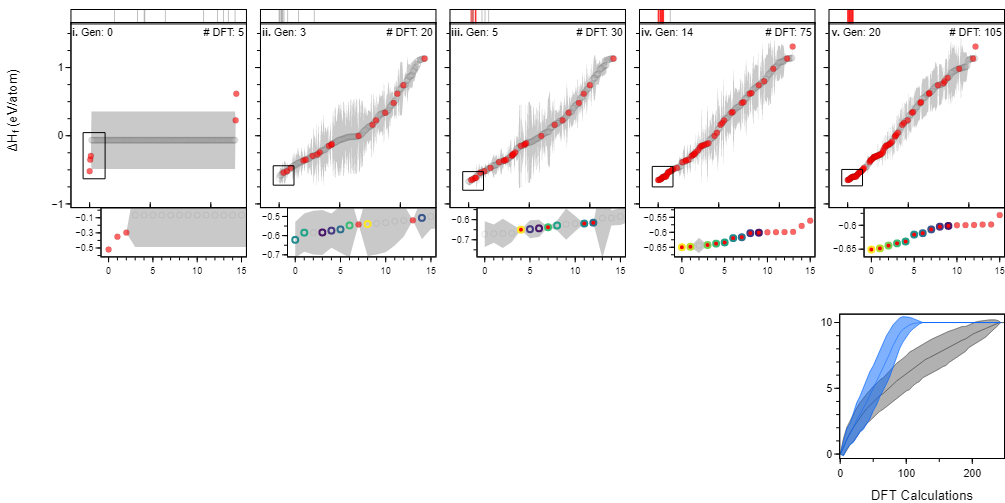

In [29]:
fig.show()